<h1 align=left><font size = 8>Product Survey Analysis</font></h1>

##### Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis
from scipy import stats

## 1. Prepare the Data

Use the Pandas method <b>read_csv()</b> to load the data

In [2]:
# Read data from CSV File for survey Responses
survey_response = pd.read_csv("Survey_Resp.csv")

In [3]:
survey_response.head(10)

,RESP_ID,SUR_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION
0,13071656,8,"MTQ5,Dk1,TMy,A==",1/18/2018 8:48,FI,uusimaa
1,13071811,10,"MTM0Mjk4,TE0OA==",1/18/2018 8:59,FR,ile-de-france
2,13071889,9,"MzY4,DgzOTU=",1/18/2018 9:05,AE,dubai
3,13071909,10,MTM4MzU5MjY2Mg==,1/18/2018 9:06,CZ,praha
4,13071920,10,"MzU3ODcz,Tg1OA==",1/18/2018 9:07,IE,NaN
5,13071988,10,"Mjk1,jk1ODE4OQ==",1/18/2018 9:11,HU,budapest
6,13072012,8,"MTM2ODUxMTE4,g==",1/18/2018 9:12,GB,NaN
7,13072097,7,"MzA1ODE0,zYwOQ==",1/18/2018 9:17,IN,uttar pradesh
8,13072253,10,"MTg0,DEwMzMx,A==",1/18/2018 9:27,GB,NaN
9,13072647,10,"MTI5,zcxMTI0Mg==",1/18/2018 9:50,GB,NaN


In [5]:
headers = ["RESPONSE_ID","SURVEY_SCORE","MASKED_IP","SURVEY_RESPONSE_DATE","COUNTRY_CODE", "REGION"]
survey_response.columns = headers
survey_response.head(10)

,RESPONSE_ID,SURVEY_SCORE,MASKED_IP,SURVEY_RESPONSE_DATE,COUNTRY_CODE,REGION
0,13071656,8,"MTQ5,Dk1,TMy,A==",1/18/2018 8:48,FI,uusimaa
1,13071811,10,"MTM0Mjk4,TE0OA==",1/18/2018 8:59,FR,ile-de-france
2,13071889,9,"MzY4,DgzOTU=",1/18/2018 9:05,AE,dubai
3,13071909,10,MTM4MzU5MjY2Mg==,1/18/2018 9:06,CZ,praha
4,13071920,10,"MzU3ODcz,Tg1OA==",1/18/2018 9:07,IE,NaN
5,13071988,10,"Mjk1,jk1ODE4OQ==",1/18/2018 9:11,HU,budapest
6,13072012,8,"MTM2ODUxMTE4,g==",1/18/2018 9:12,GB,NaN
7,13072097,7,"MzA1ODE0,zYwOQ==",1/18/2018 9:17,IN,uttar pradesh
8,13072253,10,"MTg0,DEwMzMx,A==",1/18/2018 9:27,GB,NaN
9,13072647,10,"MTI5,zcxMTI0Mg==",1/18/2018 9:50,GB,NaN


In [4]:
# Read data from CSV File for User Info
user_info = pd.read_csv("User_Info.csv", encoding = "ISO-8859-1")

In [5]:
user_info.head(10)

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE
0,14248134,803,1473270,free,free,pro,sites,1366x768,Especialista en marketing,es-mx
1,13502120,804,4641168,free,pro,pro,reporting,1440x900,NaN,en-us
2,13954226,805,5654010,free,pro,enterprise,reporting|ads,1280x800,Salesperson,en-us
3,14315322,806,4802412,free,pro,pro,reporting,1440x900,NaN,en
4,13042600,807,6746619,free,pro,pro,reporting|ssl,1920x1080,SpÃ©cialiste marketing,fr-fr
5,13438239,808,5234634,free,free,pro,NaN,1280x1024,NaN,en
6,12981556,809,12595470,free,free,free,NaN,1440x900,Partner / Agency / Freelancer,en
7,14033087,810,5348841,free,pro,pro,NaN,1920x1080,Executive / Management,en
8,12977894,811,6355494,free,pro,pro,ssl,2560x1080,I do a little bit of everything,sv
9,14296992,812,5682909,free,free,free,NaN,1366x768,NaN,pt-br


In [6]:
# df.dtypes to get the list of data types for all columns in Dataframe
survey_response.dtypes

RESP_ID          int64
SUR_SCORE        int64
MASKED_IP       object
CRT_DT          object
COUNTRY_CODE    object
REGION          object
dtype: object

In [7]:
user_info.dtypes

RESPONSE_ID                int64
USER_ID                    int64
CUSTOMER_ID                int64
CRM_PRODUCT_TIER          object
SALES_PRODUCT_TIER        object
MARKETING_PRODUCT_TIER    object
PRODUCT_ADDONS            object
SCREEN_SIZE               object
USER_ROLE                 object
LANGUAGE                  object
dtype: object

### Identify missing values

##### We are trying to find the null values using isnull method 

In [8]:
missing_data_surv_resp = survey_response.isnull()
missing_data_surv_resp.head(5)

,RESP_ID,SUR_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True


##### Now let's count the missing values in each column. "True" represents the missing  values and "False" represents the values exists in Dataset

In [9]:
for column in missing_data_surv_resp.columns.values.tolist():
    print("Column Name:",column)
    print(missing_data_surv_resp[column].value_counts())
    print("------------------------------------------------------")

Column Name: RESP_ID
False    4788
Name: RESP_ID, dtype: int64
------------------------------------------------------
Column Name: SUR_SCORE
False    4788
Name: SUR_SCORE, dtype: int64
------------------------------------------------------
Column Name: MASKED_IP
False    4788
Name: MASKED_IP, dtype: int64
------------------------------------------------------
Column Name: CRT_DT
False    4788
Name: CRT_DT, dtype: int64
------------------------------------------------------
Column Name: COUNTRY_CODE
False    3994
True      794
Name: COUNTRY_CODE, dtype: int64
------------------------------------------------------
Column Name: REGION
False    3215
True     1573
Name: REGION, dtype: int64
------------------------------------------------------


#### Survey Response Data Set : Missing data findings
Based on the summary above, each column has 4788 rows of data, and 2 columns containing missing data:
<ol>
    <li>"COUNTRY_CODE": 794 missing data</li>
    <li>"REGION": 1573 missing data</li>
</ol>

##### Now let's repeat the same for the User Info Data-set

In [10]:
missing_data_user_info = user_info.isnull()
missing_data_user_info.head(5)

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False


In [11]:
## Now let's count the missing values in each column. "True" represents the missing  values and "False" represents the values exists in Dataset
for column in missing_data_user_info.columns.values.tolist():
    print("Column Name:",column)
    print(missing_data_user_info[column].value_counts())
    print("------------------------------------------------------")

Column Name: RESPONSE_ID
False    4788
Name: RESPONSE_ID, dtype: int64
------------------------------------------------------
Column Name: USER_ID
False    4788
Name: USER_ID, dtype: int64
------------------------------------------------------
Column Name: CUSTOMER_ID
False    4788
Name: CUSTOMER_ID, dtype: int64
------------------------------------------------------
Column Name: CRM_PRODUCT_TIER
False    4788
Name: CRM_PRODUCT_TIER, dtype: int64
------------------------------------------------------
Column Name: SALES_PRODUCT_TIER
False    4788
Name: SALES_PRODUCT_TIER, dtype: int64
------------------------------------------------------
Column Name: MARKETING_PRODUCT_TIER
False    4788
Name: MARKETING_PRODUCT_TIER, dtype: int64
------------------------------------------------------
Column Name: PRODUCT_ADDONS
True     2892
False    1896
Name: PRODUCT_ADDONS, dtype: int64
------------------------------------------------------
Column Name: SCREEN_SIZE
False    4788
Name: SCREEN_SIZE, dt

#### User Info Data Set : Missing data / Null value findings
Based on the summary above, each column has 4788 rows of data, and 2 columns containing missing data:
<ol>
    <li>"USER_ROLE": 1858 missing data</li>
    <li>"PRODUCT_ADDONS": 1858 responses doesn't have any addons</li>
</ol>

## 2. Data Analysis

#### Statistical Summary of each column in Survey Response Dataset

In [14]:
# Statistical Summary of each column can be obtained using the Describe Method
survey_response[['SUR_SCORE', 'CRT_DT', 'COUNTRY_CODE','REGION']].describe(include='all')

,SUR_SCORE,CRT_DT,COUNTRY_CODE,REGION
count,4788.000000,4788,3994,3215
unique,NaN,4432,101,365
top,NaN,1/9/2018 17:56,US,california
freq,NaN,6,1468,146
mean,8.119674,NaN,NaN,NaN
std,2.435567,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN
50%,9.000000,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN


In [15]:
user_info[['CRM_PRODUCT_TIER', 'SALES_PRODUCT_TIER','MARKETING_PRODUCT_TIER', 'PRODUCT_ADDONS', 'SCREEN_SIZE', 'USER_ROLE','LANGUAGE']].describe(include='all')

,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE
count,4788,4788,4788,1896,4788,2930,4788
unique,2,4,6,12,130,41,56
top,free,pro,pro,reporting,1920x1080,Executive / Management,en
freq,4688,2441,1771,867,1203,844,2285


##### We have chosen to drop the rows which doesn't have Country Codes for our Survey Response data-set Analysis
##### And we will perform an aggregation to get country level counts and percentage of responses by country

In [16]:
srvresp_cc_counts = survey_response['COUNTRY_CODE'].value_counts(dropna = 'True').to_frame('COUNTS')

In [17]:
srvresp_cc_counts['COUNTRY_CODE'] = srvresp_cc_counts.index

In [18]:
srvresp_cc_counts.reset_index(drop=True,inplace=True)

In [19]:
srvresp_cc_counts.dtypes

COUNTS           int64
COUNTRY_CODE    object
dtype: object

In [20]:
srvresp_cc_counts['COUNTRY_%'] = (srvresp_cc_counts.COUNTS / srvresp_cc_counts.COUNTS.sum())*100
srvresp_cc_counts.head()
srvresp_cc_counts.sort_values(by=['COUNTRY_%'])
srvresp_cc_counts.head(10)

,COUNTS,COUNTRY_CODE,COUNTRY_%
0,1468,US,36.755133
1,499,GB,12.493741
2,218,CA,5.458187
3,142,FR,3.555333
4,123,DE,3.079619
5,122,AU,3.054582
6,117,BR,2.929394
7,114,ES,2.854281
8,100,NL,2.503756
9,100,IN,2.503756


In [21]:
srvresp_cc_counts

,COUNTS,COUNTRY_CODE,COUNTRY_%
0,1468,US,36.755133
1,499,GB,12.493741
2,218,CA,5.458187
3,142,FR,3.555333
4,123,DE,3.079619
5,122,AU,3.054582
6,117,BR,2.929394
7,114,ES,2.854281
8,100,NL,2.503756
9,100,IN,2.503756


#### Let's plot piechart for visual representation of the country wide responses on the survey response data-set

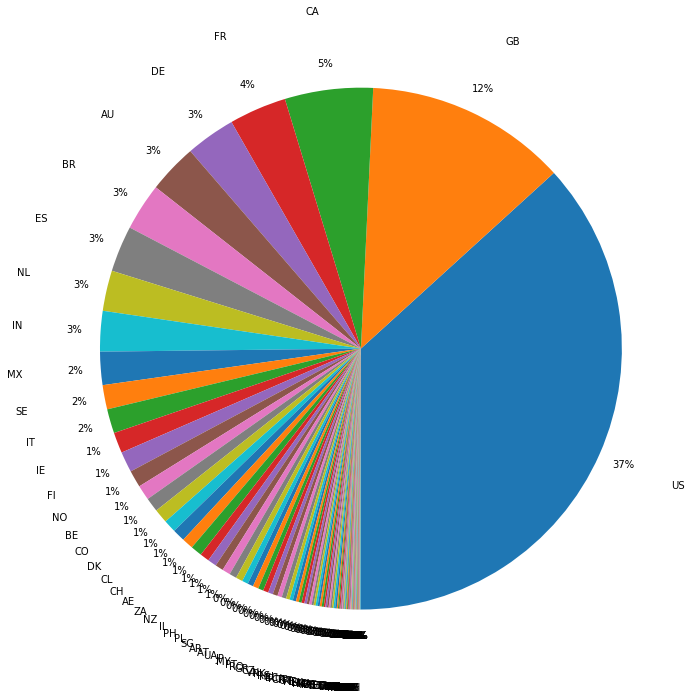

In [22]:
axis('equal');

pie(srvresp_cc_counts['COUNTRY_%'],radius = 3,startangle = 270,labels=srvresp_cc_counts['COUNTRY_CODE'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3);


#### Now we will calculate the mean survey score by each country and use the same for the purpose of binning the countries into three categories.

In [24]:
df_country_gb = survey_response[['SUR_SCORE', 'COUNTRY_CODE']].groupby(['COUNTRY_CODE']).mean().round()

In [25]:
df_country_gb['COUNTRY_CODE']=df_country_gb.index
df_country_gb.reset_index(drop=True,inplace=True)
df_country_gb.head(5)

,SUR_SCORE,COUNTRY_CODE
0,8.0,AE
1,10.0,AI
2,8.0,AM
3,7.0,AO
4,7.0,AR


In [26]:
df_country_gb.dtypes

SUR_SCORE       float64
COUNTRY_CODE     object
dtype: object

In [27]:
df_country_gb.columns=['SURVEY_SCORE_MEAN','COUNTRY_CODE']
df_country_gb.reset_index(drop=True,inplace=True)
df_country_gb = df_country_gb[['COUNTRY_CODE', 'SURVEY_SCORE_MEAN']]
df_country_gb.head(10)

,COUNTRY_CODE,SURVEY_SCORE_MEAN
0,AE,8.0
1,AI,10.0
2,AM,8.0
3,AO,7.0
4,AR,7.0
5,AT,8.0
6,AU,8.0
7,AZ,9.0
8,BE,8.0
9,BG,9.0


#### Plotting a Histogram to visualize the country counts by mean survey score on 'Y' and 'X' axes respectively

Text(0.5, 1.0, 'Binning of Country Survey Score means')

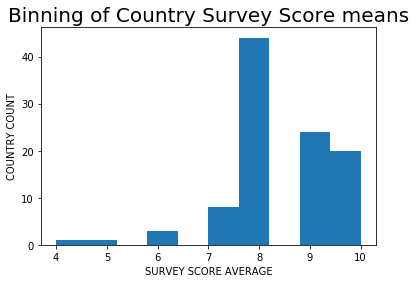

In [29]:
plt.hist(df_country_gb["SURVEY_SCORE_MEAN"])

# set x/y labels and plot title
plt.xlabel("SURVEY SCORE AVERAGE")
plt.ylabel("COUNTRY COUNT")
plt.title("Binning of Country Survey Score means", fontsize=20)

In [30]:
bins = np.linspace(min(df_country_gb["SURVEY_SCORE_MEAN"]), max(df_country_gb["SURVEY_SCORE_MEAN"]), 4)
bins

array([ 4.,  6.,  8., 10.])

In [31]:
group_names = ['LOW(0-6)', 'MEDIUM(6-8)', 'HIGH(8-10)']

In [32]:
df_country_gb['SURVEY_SCORE_BINS'] = pd.cut(df_country_gb['SURVEY_SCORE_MEAN'], bins, labels=group_names, include_lowest=True )
df_country_gb.head(5)

,COUNTRY_CODE,SURVEY_SCORE_MEAN,SURVEY_SCORE_BINS
0,AE,8.0,MEDIUM(6-8)
1,AI,10.0,HIGH(8-10)
2,AM,8.0,MEDIUM(6-8)
3,AO,7.0,MEDIUM(6-8)
4,AR,7.0,MEDIUM(6-8)


In [33]:
df_country_gb["SURVEY_SCORE_BINS"].value_counts()

MEDIUM(6-8)    52
HIGH(8-10)     44
LOW(0-6)        5
Name: SURVEY_SCORE_BINS, dtype: int64

Text(0.5, 1.0, 'SURVEY_SCORE BINS')

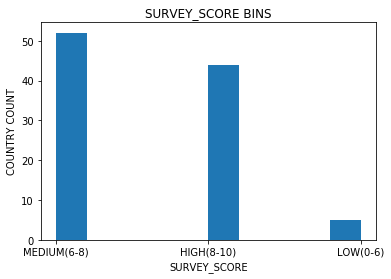

In [34]:
plt.hist(df_country_gb["SURVEY_SCORE_BINS"])

# set x/y labels and plot title
plt.xlabel("SURVEY_SCORE")
plt.ylabel("COUNTRY COUNT")
plt.title("SURVEY_SCORE BINS")

In [39]:
df_country_gb.columns

Index(['COUNTRY_CODE', 'SURVEY_SCORE_MEAN', 'SURVEY_SCORE_BINS'], dtype='object')

In [40]:
df_country_gb.loc[df_country_gb['SURVEY_SCORE_BINS'] == 'LOW(0-6)']

,COUNTRY_CODE,SURVEY_SCORE_MEAN,SURVEY_SCORE_BINS
29,EG,6.0,LOW(0-6)
54,LU,6.0,LOW(0-6)
76,PS,5.0,LOW(0-6)
90,TH,4.0,LOW(0-6)
98,VN,6.0,LOW(0-6)


In [36]:
df_country_gb.loc[df_country_gb['SURVEY_SCORE_MEAN'] == 10.0].count(1)

1      3
10     3
14     3
21     3
25     3
26     3
39     3
49     3
53     3
57     3
59     3
63     3
75     3
78     3
79     3
83     3
87     3
89     3
97     3
100    3
dtype: int64

In [57]:
survey_response.rename(columns = {'RESP_ID':'RESPONSE_ID'}, inplace = True)

In [60]:
survey_response.rename(columns = {'SUR_SCORE':'SURVEY_SCORE'}, inplace = True)
survey_response.columns

Index(['RESPONSE_ID', 'SURVEY_SCORE', 'MASKED_IP', 'CRT_DT', 'COUNTRY_CODE',
       'REGION'],
      dtype='object')

#### Join the Data-frames to perform more detailed analysis on data-sets

In [61]:
user_survey_resp=pd.merge(user_info, survey_response, on='RESPONSE_ID', how='inner')

In [62]:
user_survey_resp.head(10)

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE,SURVEY_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION
0,14248134,803,1473270,free,free,pro,sites,1366x768,Especialista en marketing,es-mx,5,"MzE4,DI5OTE0,Q==",2/27/2018 21:52,MX,jalisco
1,13502120,804,4641168,free,pro,pro,reporting,1440x900,NaN,en-us,10,",jQ2,zE4OTMw",2/2/2018 15:40,US,new york
2,13954226,805,5654010,free,pro,enterprise,reporting|ads,1280x800,Salesperson,en-us,2,"MTYy,jcwMTMwMw==",2/18/2018 5:25,US,pennsylvania
3,14315322,806,4802412,free,pro,pro,reporting,1440x900,NaN,en,5,"MTA4,jA1MTQ0OA==",3/1/2018 18:49,US,california
4,13042600,807,6746619,free,pro,pro,reporting|ssl,1920x1080,SpÃ©cialiste marketing,fr-fr,6,MTQ5OTE5OTI1Mg==,1/17/2018 10:10,FR,auvergne-rhone-alpes
5,13438239,808,5234634,free,free,pro,NaN,1280x1024,NaN,en,10,MzQ1MjkyMDg2MA==,1/31/2018 14:58,US,maryland
6,12981556,809,12595470,free,free,free,NaN,1440x900,Partner / Agency / Freelancer,en,8,"MTQxMjEzMjMw,Q==",1/15/2018 10:50,GB,NaN
7,14033087,810,5348841,free,pro,pro,NaN,1920x1080,Executive / Management,en,10,"MTIxMjgzMDk5,Q==",2/20/2018 19:46,US,massachusetts
8,12977894,811,6355494,free,pro,pro,ssl,2560x1080,I do a little bit of everything,sv,10,"MTM4,zcz,Dk5,A==",1/15/2018 7:34,SE,stockholms lan
9,14296992,812,5682909,free,free,free,NaN,1366x768,NaN,pt-br,10,MzE0MTY4MjQ3Mw==,3/1/2018 12:29,BR,sao paulo


In [63]:
dummy_1 = pd.get_dummies(user_survey_resp["CRM_PRODUCT_TIER"])
dummy_1.head()

,free,none
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [64]:
user_survey_resp = pd.concat([user_survey_resp, dummy_1], axis=1)

In [65]:
user_survey_resp.rename(columns={'free':'CRM_PROD_TIER_FREE', 'none':'CRM_PROD_TIER_NONE'}, inplace=True)
user_survey_resp.head()

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE,SURVEY_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION,CRM_PROD_TIER_FREE,CRM_PROD_TIER_NONE
0,14248134,803,1473270,free,free,pro,sites,1366x768,Especialista en marketing,es-mx,5,"MzE4,DI5OTE0,Q==",2/27/2018 21:52,MX,jalisco,1,0
1,13502120,804,4641168,free,pro,pro,reporting,1440x900,NaN,en-us,10,",jQ2,zE4OTMw",2/2/2018 15:40,US,new york,1,0
2,13954226,805,5654010,free,pro,enterprise,reporting|ads,1280x800,Salesperson,en-us,2,"MTYy,jcwMTMwMw==",2/18/2018 5:25,US,pennsylvania,1,0
3,14315322,806,4802412,free,pro,pro,reporting,1440x900,NaN,en,5,"MTA4,jA1MTQ0OA==",3/1/2018 18:49,US,california,1,0
4,13042600,807,6746619,free,pro,pro,reporting|ssl,1920x1080,SpÃ©cialiste marketing,fr-fr,6,MTQ5OTE5OTI1Mg==,1/17/2018 10:10,FR,auvergne-rhone-alpes,1,0


In [66]:
dummy_2 = pd.get_dummies(user_survey_resp["SALES_PRODUCT_TIER"])
dummy_2.head()

,free,none,pro,starter
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [67]:
user_survey_resp = pd.concat([user_survey_resp, dummy_2], axis=1)
user_survey_resp.rename(columns={'free':'SALES_PROD_TIER_FREE', 'none':'SALES_PROD_TIER_NONE', 'pro':'SALES_PROD_TIER_PRO', 'starter':'SALES_PROD_TIER_STARTER'}, inplace=True)

user_survey_resp.head(5)

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE,SURVEY_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION,CRM_PROD_TIER_FREE,CRM_PROD_TIER_NONE,SALES_PROD_TIER_FREE,SALES_PROD_TIER_NONE,SALES_PROD_TIER_PRO,SALES_PROD_TIER_STARTER
0,14248134,803,1473270,free,free,pro,sites,1366x768,Especialista en marketing,es-mx,5,"MzE4,DI5OTE0,Q==",2/27/2018 21:52,MX,jalisco,1,0,1,0,0,0
1,13502120,804,4641168,free,pro,pro,reporting,1440x900,NaN,en-us,10,",jQ2,zE4OTMw",2/2/2018 15:40,US,new york,1,0,0,0,1,0
2,13954226,805,5654010,free,pro,enterprise,reporting|ads,1280x800,Salesperson,en-us,2,"MTYy,jcwMTMwMw==",2/18/2018 5:25,US,pennsylvania,1,0,0,0,1,0
3,14315322,806,4802412,free,pro,pro,reporting,1440x900,NaN,en,5,"MTA4,jA1MTQ0OA==",3/1/2018 18:49,US,california,1,0,0,0,1,0
4,13042600,807,6746619,free,pro,pro,reporting|ssl,1920x1080,SpÃ©cialiste marketing,fr-fr,6,MTQ5OTE5OTI1Mg==,1/17/2018 10:10,FR,auvergne-rhone-alpes,1,0,0,0,1,0


In [68]:
dummy_3 = pd.get_dummies(user_survey_resp["MARKETING_PRODUCT_TIER"])
dummy_3.head()

,basic,enterprise,free,none,pro,starter
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [69]:
user_survey_resp = pd.concat([user_survey_resp, dummy_3], axis=1)
user_survey_resp.rename(columns={'basic':'MARKETING_PROD_TIER_BASIC','enterprise':'MARKETING_PROD_TIER_ENTERPRISE','free':'MARKETING_PROD_TIER_FREE', 'none':'MARKETING_PROD_TIER_NONE', 'pro':'MARKETING_PROD_TIER_PRO', 'starter':'MARKETING_PROD_TIER_STARTER'}, inplace=True)
user_survey_resp.head(5)

,RESPONSE_ID,USER_ID,CUSTOMER_ID,CRM_PRODUCT_TIER,SALES_PRODUCT_TIER,MARKETING_PRODUCT_TIER,PRODUCT_ADDONS,SCREEN_SIZE,USER_ROLE,LANGUAGE,SURVEY_SCORE,MASKED_IP,CRT_DT,COUNTRY_CODE,REGION,CRM_PROD_TIER_FREE,CRM_PROD_TIER_NONE,SALES_PROD_TIER_FREE,SALES_PROD_TIER_NONE,SALES_PROD_TIER_PRO,SALES_PROD_TIER_STARTER,MARKETING_PROD_TIER_BASIC,MARKETING_PROD_TIER_ENTERPRISE,MARKETING_PROD_TIER_FREE,MARKETING_PROD_TIER_NONE,MARKETING_PROD_TIER_PRO,MARKETING_PROD_TIER_STARTER
0,14248134,803,1473270,free,free,pro,sites,1366x768,Especialista en marketing,es-mx,5,"MzE4,DI5OTE0,Q==",2/27/2018 21:52,MX,jalisco,1,0,1,0,0,0,0,0,0,0,1,0
1,13502120,804,4641168,free,pro,pro,reporting,1440x900,NaN,en-us,10,",jQ2,zE4OTMw",2/2/2018 15:40,US,new york,1,0,0,0,1,0,0,0,0,0,1,0
2,13954226,805,5654010,free,pro,enterprise,reporting|ads,1280x800,Salesperson,en-us,2,"MTYy,jcwMTMwMw==",2/18/2018 5:25,US,pennsylvania,1,0,0,0,1,0,0,1,0,0,0,0
3,14315322,806,4802412,free,pro,pro,reporting,1440x900,NaN,en,5,"MTA4,jA1MTQ0OA==",3/1/2018 18:49,US,california,1,0,0,0,1,0,0,0,0,0,1,0
4,13042600,807,6746619,free,pro,pro,reporting|ssl,1920x1080,SpÃ©cialiste marketing,fr-fr,6,MTQ5OTE5OTI1Mg==,1/17/2018 10:10,FR,auvergne-rhone-alpes,1,0,0,0,1,0,0,0,0,0,1,0


In [70]:
user_survey_resp.dtypes

RESPONSE_ID                        int64
USER_ID                            int64
CUSTOMER_ID                        int64
CRM_PRODUCT_TIER                  object
SALES_PRODUCT_TIER                object
MARKETING_PRODUCT_TIER            object
PRODUCT_ADDONS                    object
SCREEN_SIZE                       object
USER_ROLE                         object
LANGUAGE                          object
SURVEY_SCORE                       int64
MASKED_IP                         object
CRT_DT                            object
COUNTRY_CODE                      object
REGION                            object
CRM_PROD_TIER_FREE                 uint8
CRM_PROD_TIER_NONE                 uint8
SALES_PROD_TIER_FREE               uint8
SALES_PROD_TIER_NONE               uint8
SALES_PROD_TIER_PRO                uint8
SALES_PROD_TIER_STARTER            uint8
MARKETING_PROD_TIER_BASIC          uint8
MARKETING_PROD_TIER_ENTERPRISE     uint8
MARKETING_PROD_TIER_FREE           uint8
MARKETING_PROD_T

In [56]:
user_survey_resp.corr()

,RESPONSE_ID,USER_ID,CUSTOMER_ID,SUR_SCORE,CRM_PROD_TIER_FREE,CRM_PROD_TIER_NONE,SALES_PROD_TIER_FREE,SALES_PROD_TIER_NONE,SALES_PROD_TIER_PRO,SALES_PROD_TIER_STARTER,MARKETING_PROD_TIER_BASIC,MARKETING_PROD_TIER_ENTERPRISE,MARKETING_PROD_TIER_FREE,MARKETING_PROD_TIER_NONE,MARKETING_PROD_TIER_PRO,MARKETING_PROD_TIER_STARTER
RESPONSE_ID,1.000000,0.080140,-0.014714,0.013771,-0.020840,0.020840,-0.034759,0.012628,0.008185,0.057474,0.018399,0.027487,-0.048388,0.009642,0.016174,-0.003014
USER_ID,0.080140,1.000000,0.508068,-0.059964,0.090668,-0.090668,0.025987,-0.121206,-0.031733,0.114440,-0.043302,-0.042203,0.215776,-0.072988,-0.144355,0.017044
CUSTOMER_ID,-0.014714,0.508068,1.000000,0.048987,0.079355,-0.079355,0.221866,-0.096149,-0.231601,0.109832,-0.002806,-0.249779,0.397785,-0.044402,-0.194731,0.056185
SUR_SCORE,0.013771,-0.059964,0.048987,1.000000,0.009576,-0.009576,0.082208,-0.017742,-0.085285,0.024739,-0.005430,-0.075063,0.040142,-0.003788,0.026124,-0.007433
CRM_PROD_TIER_FREE,-0.020840,0.090668,0.079355,0.009576,1.000000,-1.000000,0.125785,-0.893962,0.146026,0.029362,-0.057984,-0.038995,0.091299,-0.024784,-0.033313,0.020215
CRM_PROD_TIER_NONE,0.020840,-0.090668,-0.079355,-0.009576,-1.000000,1.000000,-0.125785,0.893962,-0.146026,-0.029362,0.057984,0.038995,-0.091299,0.024784,0.033313,-0.020215
SALES_PROD_TIER_FREE,-0.034759,0.025987,0.221866,0.082208,0.125785,-0.125785,1.000000,-0.139261,-0.878312,-0.173143,0.023618,-0.199087,0.343895,0.052489,-0.182148,-0.091211
SALES_PROD_TIER_NONE,0.012628,-0.121206,-0.096149,-0.017742,-0.893962,0.893962,-0.139261,1.000000,-0.164905,-0.032508,0.053252,0.018040,-0.099203,0.156425,0.018873,-0.022381
SALES_PROD_TIER_PRO,0.008185,-0.031733,-0.231601,-0.085285,0.146026,-0.146026,-0.878312,-0.164905,1.000000,-0.205027,-0.047188,0.210145,-0.329801,-0.108138,0.185296,0.095725
SALES_PROD_TIER_STARTER,0.057474,0.114440,0.109832,0.024739,0.029362,-0.029362,-0.173143,-0.032508,-0.205027,1.000000,0.018214,-0.048916,0.054103,0.017879,-0.028654,0.004009


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<b>Pearson Correlation</b>:
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<h3>CRM_PRODUCT_TIER vs SURVEY_SCORE</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'CRM_PRODUCT_TIER' and 'SURVEY_SCORE'.

In [59]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['CRM_PROD_TIER_FREE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

KeyError: 'SURVEY_SCORE'

<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between CRM Product Tier-Free and Survey Score is not evident, and the linear relationship doesn't exist (0.009, close to 0)

In [47]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['CRM_PROD_TIER_NONE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.009576043981805497  with a P-value of P = 0.5076763738191643


<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between CRM Product Tier-None and Survey Score is not evident, and there is no linear relationship (close to 0)

<h3>SALES_PRODUCT_TIER vs SURVEY_SCORE</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'SALES_PRODUCT_TIER' and 'SURVEY_SCORE'.

In [48]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['SALES_PROD_TIER_FREE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.08220783876241307  with a P-value of P = 1.2224833547784806e-08


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.001, the correlation between SALES Product Tier-Free and Survey Score is statistically significant, although the linear relationship doesn't exist (0.08, close to 0)

In [49]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['SALES_PROD_TIER_NONE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.01774246186717904  with a P-value of P = 0.21964510003265664


<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between SALES Product Tier-None and Survey Score is not evident, and the linear relationship is also negative (0.009, close to 0)

In [50]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['SALES_PROD_TIER_STARTER'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.024739282270331443  with a P-value of P = 0.0869595445271282


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.1, the correlation between SALES Product Tier-STARTER and Survey Score is not significantly strong, and the linear relationship doesn't exist (0.02, close to 0)

In [51]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['SALES_PROD_TIER_PRO'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.08528450242182532  with a P-value of P = 3.4102346168242675e-09


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.001, the correlation between SALES Product Tier-PRO and Survey Score is statistically significant, and the linear relationship doesn't exist (-0.08, close to 0)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


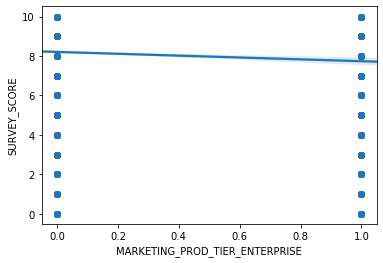

In [52]:
sns.regplot(x="MARKETING_PROD_TIER_ENTERPRISE", y="SURVEY_SCORE", data=user_survey_resp)

<h3>MARKETING_PRODUCT_TIER vs SURVEY_SCORE</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'MARKETING_PRODUCT_TIER' and 'SURVEY_SCORE'.

In [53]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_FREE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.04014208464741162  with a P-value of P = 0.005468770906780102


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.05, the correlation between MARKETING Product Tier-FREE and Survey Score is moderately certain, and the linear relationship doesn't exist (0.005, close to 0)

In [54]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_NONE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.0037879802286661483  with a P-value of P = 0.7932881233883492


<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between MARKETING Product Tier-NONE and Survey Score is not certain, and the linear relationship doesn't exist (-0.003, close to 0)

In [55]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_STARTER'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.007433081492798794  with a P-value of P = 0.6071068022453392


<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between SALES Product Tier-PRO and Survey Score is not certain, and the linear relationship doesn't exist (-0.007, close to 0)

In [56]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_PRO'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.02612366117582166  with a P-value of P = 0.07068855872986965


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.1, the correlation between MARKETING Product Tier-PRO and Survey Score is weakly certain, and the linear relationship doesn't exist (0.07, close to 0)

In [57]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_BASIC'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.005429934472630359  with a P-value of P = 0.7071912250174903


<h5>Conclusion:</h5>

Since the p-value is $>$ 0.1, the correlation between MARKETING Product Tier-BASIC and Survey Score is not certain, and the linear relationship doesn't exist (-0.005, close to 0)

In [58]:
pearson_coef, p_value = stats.pearsonr(user_survey_resp['MARKETING_PROD_TIER_ENTERPRISE'], user_survey_resp['SURVEY_SCORE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07506261331417365  with a P-value of P = 1.9932451831871978e-07


<h5>Conclusion:</h5>

Since the p-value is $<$ 0.001, the correlation between MARKETING Product Tier-ENTERPRISE and Survey Score is Statistically significant, although linear relationship doesn't exist (-0.07, close to 0)

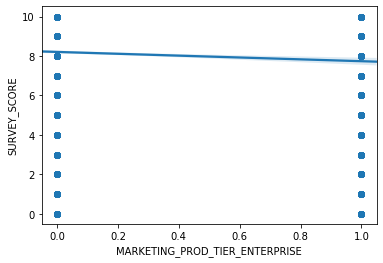

In [59]:
sns.regplot(x="MARKETING_PROD_TIER_ENTERPRISE", y="SURVEY_SCORE", data=user_survey_resp)

In [60]:
#df_group_one = user_survey_resp[user_survey_resp['SURVEY_SCORE'] & (user_survey_resp['MARKETING_PRODUCT_TIER'])]
df_group_one= user_survey_resp[['SURVEY_SCORE', 'MARKETING_PRODUCT_TIER']].groupby(['MARKETING_PRODUCT_TIER']).mean()
df_group_one.head(10)

,SURVEY_SCORE
MARKETING_PRODUCT_TIER,
basic,8.055838
enterprise,7.737374
free,8.250000
none,8.060870
pro,8.202710
starter,7.988889


In [61]:
df_group_two= user_survey_resp[['SURVEY_SCORE', 'SALES_PRODUCT_TIER']].groupby(['SALES_PRODUCT_TIER']).mean()
df_group_two.head(10)

,SURVEY_SCORE
SALES_PRODUCT_TIER,
free,8.352133
none,7.852459
pro,7.916018
starter,8.419355


In [62]:
df_group_three= user_survey_resp[['SURVEY_SCORE', 'CRM_PRODUCT_TIER']].groupby(['CRM_PRODUCT_TIER']).mean()
df_group_three.head(10)

,SURVEY_SCORE
CRM_PRODUCT_TIER,
free,8.12308
none,7.96000


In [63]:
df_group_four= user_survey_resp[['SURVEY_SCORE', 'CUSTOMER_ID']].groupby(['CUSTOMER_ID']).mean()
df_group_four.head(10)

,SURVEY_SCORE
CUSTOMER_ID,
2973,8.0
30462,9.0
31341,7.5
32100,9.0
51219,10.0
61875,10.0
62175,9.0
82467,10.0
86523,3.0


In [64]:
df_group_four.loc[df_group_four['SURVEY_SCORE'] < 6.0].count()

SURVEY_SCORE    483
dtype: int64

#### 483 Customers have Average Survey Score less than 6.0

In [68]:
df_group_four.loc[df_group_four['SURVEY_SCORE'] > 8.0].count()

SURVEY_SCORE    2355
dtype: int64

#### 2355 customers responded with average score greater than 8.0

In [65]:
df_group_five= user_survey_resp[['SURVEY_SCORE', 'USER_ID']].groupby(['USER_ID']).mean()
df_group_five.head(10)

,SURVEY_SCORE
USER_ID,
1,9
2,10
3,10
4,10
5,10
6,8
7,8
8,8
9,10


In [66]:
df_group_five.loc[df_group_five['SURVEY_SCORE'] < 6.0].count()

SURVEY_SCORE    619
dtype: int64

#### 619 users have Average Survey Score less than 6.0

In [67]:
df_group_five.loc[df_group_five['SURVEY_SCORE'] > 8.0].count()

SURVEY_SCORE    2674
dtype: int64

#### 2674 users responded with average score greater than 8.0